# Regression Analysis

## Problem statement
- use simple linear regression (using bivariate) algorithm for prediction


### import required packages 

In [134]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns


In [135]:
df = pd.read_csv('./NewspaperData.csv')
print(df)

                         Newspaper     daily    sunday
0                    Baltimore Sun   391.952   488.506
1                     Boston Globe   516.981   798.298
2                    Boston Herald   355.628   235.084
3               Charlotte Observer   238.555   299.451
4                Chicago Sun Times   537.780   559.093
5                  Chicago Tribune   733.775  1133.249
6              Cincinnati Enquirer   198.832   348.744
7                      Denver Post   252.624   417.779
8              Des Moines Register   206.204   344.522
9                 Hartford Courant   231.177   323.084
10               Houston Chronicle   449.755   620.752
11                Kansas City Star   288.571   423.305
12         Los Angeles Daily  News   185.736   202.614
13               Los Angeles Times  1164.388  1531.527
14                    Miami Herald   444.581   553.479
15        Minneapolis Star Tribune   412.871   685.975
16      New Orleans Times-Picayune   272.280   324.241
17        

### Exploratory Data Analysis

In [136]:
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [137]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


#### find the corariance between the columns to check if there is any relationship between them

In [139]:
# using numpy

covariance = np.cov(df['daily'], df['sunday'])
covariance

array([[ 72474.81572274,  97095.58018419],
       [ 97095.58018419, 141690.54926825]])

In [140]:
df.drop(['Newspaper'], axis=1, inplace=True)
print(df)



       daily    sunday
0    391.952   488.506
1    516.981   798.298
2    355.628   235.084
3    238.555   299.451
4    537.780   559.093
5    733.775  1133.249
6    198.832   348.744
7    252.624   417.779
8    206.204   344.522
9    231.177   323.084
10   449.755   620.752
11   288.571   423.305
12   185.736   202.614
13  1164.388  1531.527
14   444.581   553.479
15   412.871   685.975
16   272.280   324.241
17   781.796   983.240
18  1209.225  1762.015
19   825.512   960.308
20   223.748   284.611
21   354.843   407.760
22   515.523   982.663
23   220.465   557.000
24   337.672   440.923
25   197.120   268.060
26   133.239   262.048
27   374.009   432.502
28   273.844   338.355
29   570.364   704.322
30   391.286   585.681
31   201.860   267.781
32   321.626   408.343
33   838.902  1165.567


In [141]:
# using pandas 
df.cov()

,daily,sunday
daily,72474.815723,97095.580184
sunday,97095.580184,141690.549268


#### find the correlation between the columns to check if what is the degree of relationship

In [142]:
# using numpy
np.corrcoef(df['daily'], df['sunday'])

array([[1.        , 0.95815431],
       [0.95815431, 1.        ]])

In [143]:
# using pandas
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


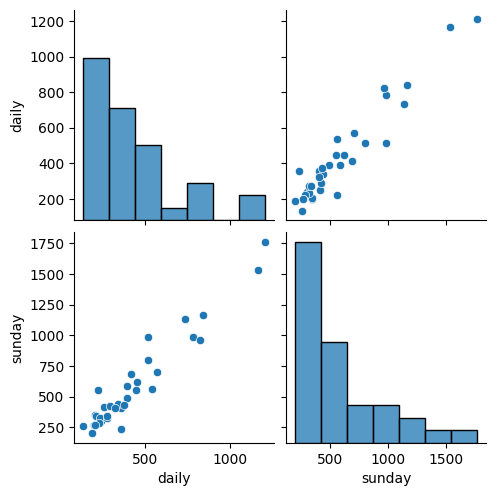

In [144]:
# check the relationship graphically
sns.pairplot(df)

### split the data into dependenct and independent columns

In [145]:
# y = salary
# y will always be a series (one dimensional array)
y = df['sunday']

# x = YearsExpeience
# x will always be a data frame (miltidimensional)
x = df.drop('sunday', axis=1)

### create the model

In [146]:
from sklearn.linear_model import LinearRegression

# create a new object of LinearRegression
model = LinearRegression()

# fit the data
model.fit(x, y)


LinearRegression()

### result visualization

In [147]:
mean_values = np.ones(y.size) * y.mean()
mean_values

array([591.20241176, 591.20241176, 591.20241176, 591.20241176,
       591.20241176, 591.20241176, 591.20241176, 591.20241176,
       591.20241176, 591.20241176, 591.20241176, 591.20241176,
       591.20241176, 591.20241176, 591.20241176, 591.20241176,
       591.20241176, 591.20241176, 591.20241176, 591.20241176,
       591.20241176, 591.20241176, 591.20241176, 591.20241176,
       591.20241176, 591.20241176, 591.20241176, 591.20241176,
       591.20241176, 591.20241176, 591.20241176, 591.20241176,
       591.20241176, 591.20241176])

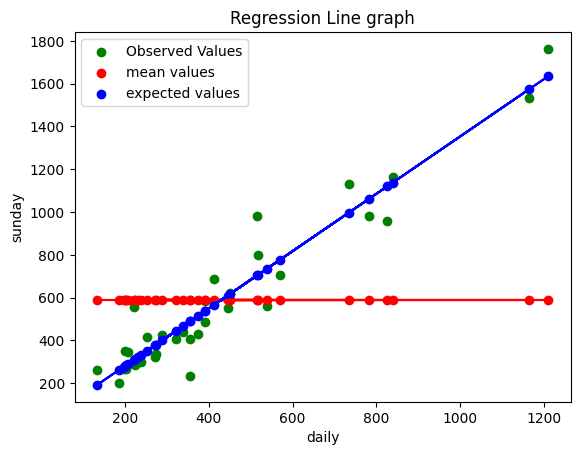

In [148]:
# show the observed values
plt.scatter(x['daily'], y, label='Observed Values', color="green") 

# draw mean line
mean_values = np.ones(y.size) * y.mean()
plt.plot(x['daily'], mean_values, color='red')
plt.scatter(x['daily'], mean_values, color='red', label="mean values")

# draw the regression line
plt.plot(x['daily'], model.predict(x), color='blue')
plt.scatter(x['daily'], model.predict(x), color='blue', label="expected values")


# title
plt.title('Regression Line graph')
plt.xlabel('daily')
plt.ylabel('sunday')

plt.legend()

In [149]:
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [150]:
x

,daily
0,391.952
1,516.981
2,355.628
3,238.555
4,537.780
5,733.775
6,198.832
7,252.624
8,206.204
9,231.177


In [151]:
y

0      488.506
1      798.298
2      235.084
3      299.451
4      559.093
5     1133.249
6      348.744
7      417.779
8      344.522
9      323.084
10     620.752
11     423.305
12     202.614
13    1531.527
14     553.479
15     685.975
16     324.241
17     983.240
18    1762.015
19     960.308
20     284.611
21     407.760
22     982.663
23     557.000
24     440.923
25     268.060
26     262.048
27     432.502
28     338.355
29     704.322
30     585.681
31     267.781
32     408.343
33    1165.567
Name: sunday, dtype: float64